In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense,Flatten,Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
img_rows=28
img_cols=28
channals=1

img_shape=(img_rows,img_cols,channals)
z_dim=100

In [3]:
def build_generator(img_shape, z_dim):
    model=Sequential()
    #Fully connected layer
    model.add(Dense(128,input_dim=z_dim))
    #Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))
    # Output layer with tanh activation
    model.add(Dense(28*28*1,activation="tanh"))
    model.add(Reshape(img_shape))
    return model

In [4]:
def build_discriminator(img_shape):
    model=Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1,activation="sigmoid"))
    return model

In [5]:
def build_gan(generator, discriminator):
    model=Sequential()
    # Combined Generator -> Discriminator model
    model.add(generator)
    model.add(discriminator)
    return model

In [6]:
# Build and compile the Discriminator
discriminator=build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',optimizer=Adam(),
                     metrics=['accuracy'])
# Build the Generator
generator=build_generator(img_shape,z_dim)
# Keep Discriminator's parameters constant for Generator training
discriminator.trainable=False
gan=build_gan(generator,discriminator)
gan.compile(loss='binary_crossentropy',optimizer=Adam())

In [8]:
losses=[]
accuracies=[]
iteration_checkpoints=[]

def train(iterations,batch_size,sample_interval):
    (X_train,_),(_,_)=mnist.load_data()
    # Rescale [0,255]
    X_train=X_train/127.5-1.0
    X_train=np.expand_dims(X_train,axis=3)
    # Labels for real images:all ones
    real=np.ones((batch_size,1))
    # Labels for fake images:all zeros
    fake=np.zeros((batch_size,1))
    for iteration in range(iterations):
        # Train the Discriminator
        #--------------------------
        # Get a random batch of real images
        idx=np.random.randint(0,X_train.shape[0],batch_size)
        imgs=X_train[idx]
        
        # Generate a batch of fake images
        z=np.random.normal(0,1,(batch_size,100))
        gen_imgs=generator.predict(z)
        
        # Train Discriminator
        d_loss_real=discriminator.train_on_batch(imgs,real)
        d_loss_fake=discriminator.train_on_batch(gen_imgs,fake)
        d_loss,accuracy=0.5*np.add(d_loss_real,d_loss_fake)
        #--------------------------------
        # Train the Generator
        #--------------------------------
        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Generator
        g_loss = gan.train_on_batch(z, real)
        
        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            sample_images(generator)

In [9]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):

    # Sample random noise
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise
    gen_imgs = generator.predict(z)

    # Rescale image pixel values to [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5
    
    # Set image grid
    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output a grid of images
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1

C:\Users\user\anaconda3\envs\TF37\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\user\anaconda3\envs\TF37\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1000 [D loss: 0.030984, acc.: 100.00%] [G loss: 3.803757]
2000 [D loss: 0.089675, acc.: 96.48%] [G loss: 7.385755]
3000 [D loss: 0.076135, acc.: 97.66%] [G loss: 5.673403]
4000 [D loss: 0.235131, acc.: 90.62%] [G loss: 4.387173]
5000 [D loss: 0.289223, acc.: 88.28%] [G loss: 3.689941]
6000 [D loss: 0.208140, acc.: 92.97%] [G loss: 5.047041]
7000 [D loss: 0.428972, acc.: 80.08%] [G loss: 3.866082]
8000 [D loss: 0.333982, acc.: 87.89%] [G loss: 3.115473]
9000 [D loss: 0.420042, acc.: 83.20%] [G loss: 3.357567]
10000 [D loss: 0.283672, acc.: 88.67%] [G loss: 3.751824]
11000 [D loss: 0.389231, acc.: 83.59%] [G loss: 3.211036]
12000 [D loss: 0.455567, acc.: 78.91%] [G loss: 2.561950]
13000 [D loss: 0.350530, acc.: 83.20%] [G loss: 2.773377]
14000 [D loss: 0.510761, acc.: 76.95%] [G loss: 2.532418]
15000 [D loss: 0.468116, acc.: 79.69%] [G loss: 2.639642]
16000 [D loss: 0.580987, acc.: 70.70%] [G loss: 2.422050]
17000 [D loss: 0.457794, acc.: 78.12%] [G loss: 2.366385]
18000 [D loss: 0.60432

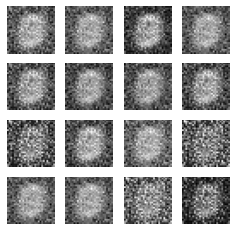

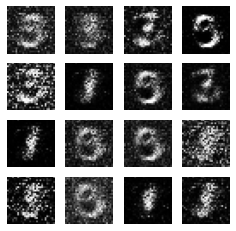

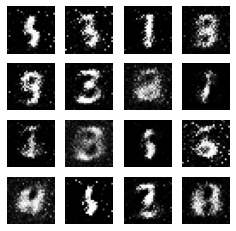

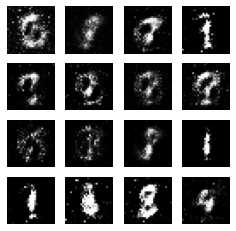

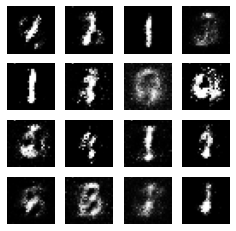

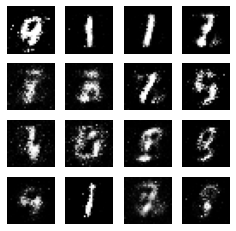

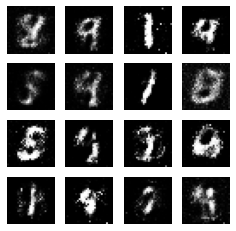

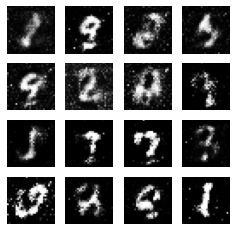

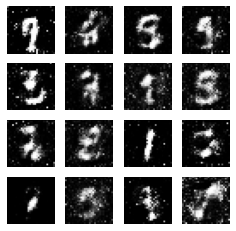

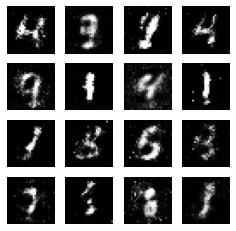

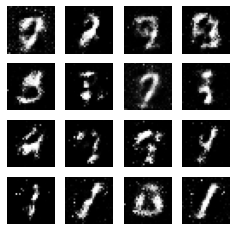

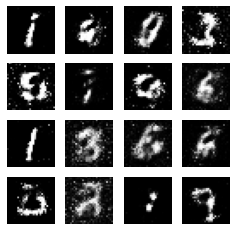

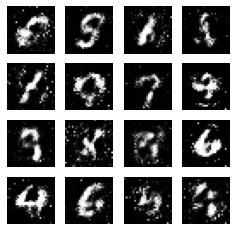

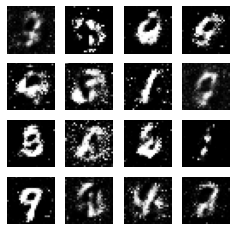

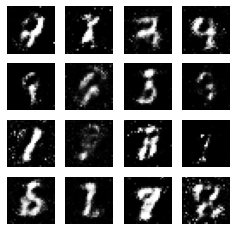

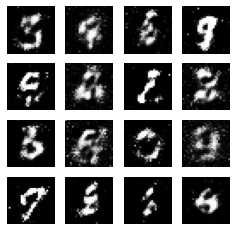

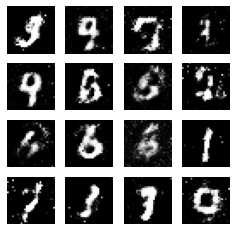

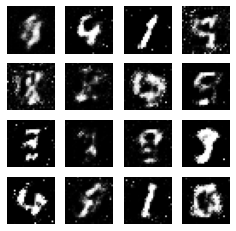

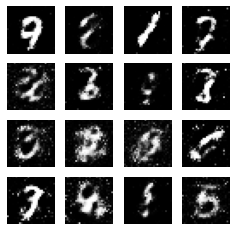

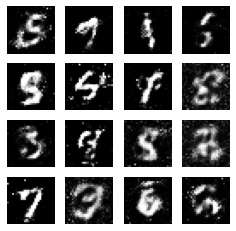

In [10]:
# Set hyperparameters
iterations = 20000
batch_size = 128
sample_interval = 1000

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)